In [1]:
!python --version

Python 3.7.12


In [2]:
import nltk
import os
import string
import collections
import re
import time
import random
import itertools
from tqdm.auto import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#Scraping
import requests
from bs4 import BeautifulSoup

#Text preprocessing
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#Feature selection
from sklearn.feature_selection import chi2

#Standardization
from sklearn.preprocessing import MinMaxScaler

#Text representation
from sklearn.feature_extraction.text import TfidfVectorizer

#Text classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_recall_curve, auc, confusion_matrix,
                             plot_confusion_matrix, f1_score, fbeta_score, 
                             precision_score, recall_score, classification_report, roc_curve)

#Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Text Clustering
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import (rand_score, fowlkes_mallows_score)
from sklearn.cluster import KMeans

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
nltk==3.2.5
re==2.2.1
pandas==1.1.5
numpy==1.19.5
requests==2.23.0
seaborn==0.11.2


# Scraping con Beautiful Soup

In [ ]:
fakedf = pd.read_csv("New task.csv", encoding = 'latin-1')
fakedf['Link_Of_News'][0]

In [ ]:
def extract_corpus(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return list(soup.select("article.m-textblock p"))

In [ ]:
d1 = fakedf[:1000]
d2 = fakedf[1000:2000]
d3 = fakedf[2000:3000]
d4 = fakedf[3000:4000]
d5 = fakedf[4000:5000]
d6 = fakedf[5000:6000]
d7 = fakedf[6000:7000]
d8 = fakedf[7000:8000]
d9 = fakedf[8000:9000]
d10 = fakedf[9000:]

In [ ]:
d1['corpus'] = d1['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d1.to_csv('d1.csv', index=False, encoding = 'utf-8')

In [ ]:
d2['corpus'] = d2['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d2.to_csv('d2.csv', index=False, encoding = 'utf-8')

In [ ]:
d3['corpus'] = d3['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d3.to_csv('d3.csv', index=False, encoding = 'utf-8')

In [ ]:
d4['corpus'] = d4['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d4.to_csv('d4.csv', index=False, encoding = 'utf-8')

In [ ]:
d5['corpus'] = d5['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d5.to_csv('d5.csv', index=False, encoding = 'utf-8')

In [ ]:
d6['corpus'] = d6['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d6.to_csv('d6.csv', index=False, encoding = 'utf-8')

In [ ]:
d7['corpus'] = d7['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d7.to_csv('d7.csv', index=False, encoding = 'utf-8')

In [ ]:
d8['corpus'] = d8['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d8.to_csv('d8.csv', index=False, encoding = 'utf-8')

In [ ]:
d9['corpus'] = d9['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d9.to_csv('d9.csv', index=False, encoding = 'utf-8')

In [ ]:
d10['corpus'] = d10['Link_Of_News'].progress_apply(lambda x: extract_corpus(x))
d10.to_csv('d10.csv', index=False, encoding = 'utf-8')

In [ ]:
df = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10], ignore_index=True)

In [ ]:
df.to_csv('fakenews.csv', index=False, encoding = 'utf-8')

# Caricando direttamente il file

- Source
- Conto delle Label

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Progetto TM&S/Dati/fakenews.csv')
df.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label,corpus
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE,[<p>It’s Father’s Day weekend. What do you get...
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,"[<p>President Donald Trump <a href=""https://ar..."
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE,[<p>President Donald Trump is continuing to st...
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,[<p>Paul Junge — one of several Republican can...
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE,"[<p>The death of George Floyd, a Black man, at..."


In [8]:
def str_to_list(string):
    li = string.strip('[').strip(']').split("</p>, ")
    return li

df['corpus'] = df['corpus'].apply(lambda x: str_to_list(x))

# Esplorativa

In [9]:
df.groupby('Source').count().sort_values('corpus', ascending=False).head(20)['News_Headline']

Source
Donald Trump       802
Facebook posts     655
Bloggers           534
Viral image        393
Hillary Clinton    210
Bernie Sanders     159
Scott Walker       130
Barack Obama       125
Ted Cruz           123
Marco Rubio        101
Rick Scott          74
Jeb Bush            69
Joe Biden           61
Greg Abbott         50
Paul Ryan           47
Rand Paul           46
Ron Johnson         42
Mike Pence          42
Tammy Baldwin       40
Charlie Crist       36
Name: News_Headline, dtype: int64

In [10]:
df.groupby('Label').count().sort_values('corpus', ascending=False)['News_Headline']

Label
FALSE          2273
barely-true    1737
mostly-true    1722
half-true      1685
pants-fire     1402
TRUE           1036
full-flop        70
half-flip        27
no-flip           8
Name: News_Headline, dtype: int64

# Preprocessing

In [11]:
def strip_html(list_):
    li = [re.sub('<.*?>', '', s) for s in list_]
    return li

df['corpus'] = df['corpus'].apply(lambda x: strip_html(x))

In [12]:
def remove_rating(list_):
    x = [s for s in list_ if "We rate" in s or "we rate" in s]
    for i in x:
        list_.remove(i)
    return list_

df['corpus'].apply(lambda x: remove_rating(x))

0       [It’s Father’s Day weekend. What do you get fo...
1       [President Donald Trump shared a manipulated v...
2       [President Donald Trump is continuing to stand...
3       [Paul Junge — one of several Republican candid...
4       [The death of George Floyd, a Black man, at th...
                              ...                        
9955    [U.S. Rep. Michael McCaul of Texas warned of b...
9956    [\nPresident Barack Obama has taken a lot of c...
9957    [\nThe race for the U.S. Senate seat being vac...
9958    [\nHas Sen. Marco Rubio, R-Fla., promised one ...
9959    [\nIn the six months since a gunman killed his...
Name: corpus, Length: 9960, dtype: object

In [13]:
len(df[df['corpus'].apply(lambda x: len(x))<5])

36

In [14]:
data = df[~(df['corpus'].apply(lambda x: len(x)) < 5)].copy(deep=True)

In [15]:
def create_string(text):
    x = ' '.join(t for t in text)
    return x

data['text'] = data['corpus'].apply(lambda x: create_string(x))
data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

In [16]:
#Reference: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u0400-\u0500" # cyrillic
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [17]:
data['text'] = data['text'].apply(lambda x: remove_emoji(x))

In [18]:
data['text'] = data['text'].str.replace(r'\d+', '', regex=True)

In [19]:
SUBS_MAP = {
"ain’t": "is not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so as",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have",
"u.s.": "usa",
"u.s.a.": "usa",
"\n":" ",
"\xa0":" "
}

In [20]:
ADDITIONAL_SUBS_MAP = {
    '≥' : ' ',
    '≤': ' ',
    '≠': ' ',
    '↓': ' ',
    '→': ' ',
    '↑': ' ',
    '⅔': ' ',
    '℃': ' ',
    '\u2060': ' ',
    '⁄': ' ',
    '″': ' ',
    '′s': ' ',
    '\u202a': ' ',
    '…': ' ',
    '•': ' ',
    '”': ' ',
    '“': ' ',
    '’': ' ',
    '‘': ' ',
    '―': ' ',
    '—–': ' ',
    '—': ' ',
    '––': ' ',
    '–': ' ',
    '‒': ' ',
    '‑': ' ',
    '‐': ' ',
    '\u200b': ' ',
    '\u200c': ' ',
    '\u200e': ' ',
    '¿': ' ',
    '½': ' ',
    '¼': ' ',
    '·': ' ',
    '±': ' ',
    '°f': ' fahrenheit',
    '°c': ' celsius',
    '°': ' ',
    '\xad': ' ',
    '§': ' ',
    '£': ' ',
    '¢': ' ',
    '¡': ' ',
    '\x92': ' ',
    '\x93': ' ',
    '\x94': ' ',
    '\x7f': ' '
}

In [21]:
def remove_contractions(text, map_):
    for word, initial in map_.items():
        text = text.replace(word, initial)
    return text

data['text'] = data['text'].apply(lambda x: remove_contractions(x, SUBS_MAP))
#ricavate da una prima iterazione
data['text'] = data['text'].apply(lambda x: remove_contractions(x, ADDITIONAL_SUBS_MAP))

In [22]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: remove_stopwords(text))

In [23]:
def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(string.punctuation, ' '))
    return text.translate(trans)

data['text'] = data['text'].apply(lambda text: remove_punctuation(text))

In [24]:
def remove_whitespaces(text):
    return " ".join(text.split())

data['text'] = data['text'].apply(lambda x: remove_whitespaces(x))

In [25]:
data['text']

0       father day weekend get wealthy man also occupi...
1       president donald trump shared manipulated vide...
2       president donald trump continuing stand firm o...
3       paul junge one several republican candidates l...
4       death george floyd black man hands minneapolis...
                              ...                        
9955    usa rep michael mccaul texas warned bad guys h...
9956    president barack obama taken lot criticism fri...
9957    race usa senate seat vacated retiring saxby ch...
9958    sen marco rubio r fla promised one kind immigr...
9959    six months since gunman killed mother six educ...
Name: text, Length: 9924, dtype: object

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word

## Feature Engineering

In [28]:
data.groupby('Label').size()

Label
FALSE          2266
TRUE           1032
barely-true    1731
full-flop        70
half-flip        27
half-true      1680
mostly-true    1717
no-flip           8
pants-fire     1393
dtype: int64

In [29]:
data = data[~((data['Label']=='full-flop')|(data['Label']=='half-flip')|(data['Label']=='no-flip'))]

In [30]:
TFlabel = []
for i in data['Label']:
    if (i=='TRUE')|(i=='mostly-true')|(i=='half-true'):
        TFlabel.append('REAL')
    else:
        TFlabel.append('FAKE')

data['grouped_label'] = TFlabel

In [31]:
data['temp'] = data['corpus'].apply(lambda x: create_string(x))

data['char_count'] = data['temp'].apply(len)
data['word_count'] = data['temp'].apply(lambda x: len(x.split()))
data['word_density'] = data['char_count'] / (data['word_count']+1)
data['punctuation_count'] = data['temp'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
data['upper_case_word_count'] = data['temp'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [32]:
data.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label,corpus,text,grouped_label,temp,char_count,word_count,word_density,punctuation_count,upper_case_word_count
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE,[It’s Father’s Day weekend. What do you get fo...,father day weekend get wealthy man also occupi...,FAKE,It’s Father’s Day weekend. What do you get for...,3734,624,5.974400,123,8
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,[President Donald Trump shared a manipulated v...,president donald trump shared manipulated vide...,FAKE,President Donald Trump shared a manipulated vi...,3353,556,6.019749,103,26
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE,[President Donald Trump is continuing to stand...,president donald trump continuing stand firm o...,FAKE,President Donald Trump is continuing to stand ...,3476,611,5.679739,101,12
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,[Paul Junge — one of several Republican candid...,paul junge one several republican candidates l...,FAKE,Paul Junge — one of several Republican candida...,6176,994,6.207035,145,13
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE,"[The death of George Floyd, a Black man, at th...",death george floyd black man hands minneapolis...,REAL,"The death of George Floyd, a Black man, at the...",3632,611,5.934641,93,6


In [33]:
scaler = MinMaxScaler()

data['char_count'] = scaler.fit_transform(data['char_count'].values.reshape(-1,1))
data['word_count'] = scaler.fit_transform(data['word_count'].values.reshape(-1,1))
data['word_density'] = scaler.fit_transform(data['word_density'].values.reshape(-1,1))
data['punctuation_count'] = scaler.fit_transform(data['punctuation_count'].values.reshape(-1,1)) 
data['upper_case_word_count'] = scaler.fit_transform(data['upper_case_word_count'].values.reshape(-1,1))

In [34]:
data.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label,corpus,text,grouped_label,temp,char_count,word_count,word_density,punctuation_count,upper_case_word_count
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE,[It’s Father’s Day weekend. What do you get fo...,father day weekend get wealthy man also occupi...,FAKE,It’s Father’s Day weekend. What do you get for...,0.173188,0.184967,0.404920,0.215768,0.097561
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,[President Donald Trump shared a manipulated v...,president donald trump shared manipulated vide...,FAKE,President Donald Trump shared a manipulated vi...,0.151200,0.159912,0.433766,0.174274,0.317073
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE,[President Donald Trump is continuing to stand...,president donald trump continuing stand firm o...,FAKE,President Donald Trump is continuing to stand ...,0.158299,0.180177,0.217490,0.170124,0.146341
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,[Paul Junge — one of several Republican candid...,paul junge one several republican candidates l...,FAKE,Paul Junge — one of several Republican candida...,0.314116,0.321297,0.552896,0.261411,0.158537
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE,"[The death of George Floyd, a Black man, at th...",death george floyd black man hands minneapolis...,REAL,"The death of George Floyd, a Black man, at the...",0.167301,0.180177,0.379629,0.153527,0.073171


# Classificazione

In [ ]:
def score_model(clf, X_train, X_test, y_train, y_test):
    train_score = clf.score(X_train, y_train) # Train Accuracy
    test_score = clf.score(X_test, y_test)    # Test Accuracy

    predictions = clf.predict(X_test)

    prec = precision_score(y_test, predictions, average='weighted')
    rec = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted') # F1
    f2 = fbeta_score(y_test, predictions, beta=2, average='weighted') # F2
    scores_strings = ["Train Accuracy", "Test Accuracy", "Test Precision",
                      "Test Recall", "Test F1", "Test F2"]

    scores = [train_score, test_score, prec, rec, f1, f2]
    
    print(clf)

    print(("{:20s} {:.5f}\n"*6)[:-1].format(*itertools.chain(*zip(scores_strings, scores))))
    print("Classification report:")
    print(classification_report(y_test, predictions, digits=5))
    
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()

In [ ]:
data.columns

Index(['News_Headline', 'Link_Of_News', 'Source', 'Stated_On', 'Date', 'Label',
       'corpus', 'text', 'grouped_label', 'temp', 'char_count', 'word_count',
       'word_density', 'punctuation_count', 'upper_case_word_count'],
      dtype='object')

In [ ]:
X = data.loc[:,['text','char_count', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count']]
y = data.grouped_label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## TF-IDF Representation (con Chi2 Feature Selection )

In [ ]:
%%time
tfidf_vect = TfidfVectorizer(min_df=0.01, max_df=0.50, tokenizer=lemmatize_all)
X_train_tfidf = tfidf_vect.fit_transform(X_train.iloc[:,0])

Wall time: 4min 42s


In [ ]:
train_w_matrix = X_train_tfidf.toarray()

train_vocab = tfidf_vect.get_feature_names_out()

train_w_df = pd.DataFrame(np.round(train_w_matrix, 2), columns=list(train_vocab))

In [ ]:
train_w_df.head()

,a,abandon,abbott,abc,abide,ability,able,abortion,about,above,...,yesterday,yet,yield,york,you,young,youth,youtube,zero,zone
0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.04,0.0,0.0,...,0.0,0.00,0.0,0.03,0.0,0.0,0.0,0.0,0.00,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,0.06,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0.0,...,0.0,0.00,0.0,0.03,0.0,0.0,0.0,0.0,0.00,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.15,0.0


In [ ]:
%%time
X_test_tfidf = tfidf_vect.transform(X_test.iloc[:,0])

Wall time: 1min 14s


In [ ]:
test_w_matrix= X_test_tfidf.toarray()

test_vocab = tfidf_vect.get_feature_names_out()

test_w_df=pd.DataFrame(np.round(test_w_matrix, 2), columns=list(test_vocab))

In [ ]:
test_w_df.head()

,a,abandon,abbott,abc,abide,ability,able,abortion,about,above,...,yesterday,yet,yield,york,you,young,youth,youtube,zero,zone
0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
3,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.02,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.00,0.0


In [ ]:
X_train.iloc[:,1:6].reset_index(drop=True)

,char_count,word_count,word_density,punctuation_count,upper_case_word_count
0,0.166032,0.178335,0.387670,0.180498,0.036585
1,0.085411,0.099116,0.195653,0.087137,0.024390
2,0.139716,0.145173,0.485181,0.132780,0.060976
3,0.367671,0.379882,0.520420,0.360996,0.182927
4,0.143583,0.147015,0.529655,0.163900,0.195122
...,...,...,...,...,...
7850,0.130136,0.133382,0.523502,0.155602,0.060976
7851,0.295591,0.322034,0.340178,0.296680,0.048780
7852,0.158241,0.159543,0.580225,0.136929,0.048780
7853,0.641620,0.690494,0.379478,0.807054,0.597561


In [ ]:
X_train_new = pd.merge(train_w_df, 
                       X_train.iloc[:,1:6].reset_index(drop=True), 
                       left_index=True, right_index=True)

X_test_new = pd.merge(test_w_df, 
                      X_test.iloc[:,1:6].reset_index(drop=True), 
                      left_index=True, right_index=True)

In [ ]:
X_names = list(X_train_new.columns)
p_value_limit = 0.90
dtf_features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2_, p = chi2(X_train_new, y_train==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
print("Numero di feature considerate: {}".format(len(X_names)))

Numero di feature considerate: 228


In [ ]:
dtf_features

,feature,score,y
1129,facebook,1.000000,FAKE
2290,post,1.000000,FAKE
2009,news,1.000000,FAKE
1141,fake,1.000000,FAKE
2235,photo,1.000000,FAKE
...,...,...,...
1973,nancy,0.904731,REAL
1381,hat,0.903958,REAL
3372,youtube,0.902623,REAL
2389,protester,0.902480,REAL


In [ ]:
X_train_chi2 = X_train_new.loc[:,X_names]
X_test_chi2 = X_test_new.loc[:,X_names]

y_train_chi2 = y_train.reset_index(drop=True)
y_test_chi2 = y_test.reset_index(drop=True)

### Logistic Regression

In [ ]:
%%time
lr = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train_chi2, y_train_chi2)

Wall time: 108 ms


LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')
Train Accuracy       0.75901
Test Accuracy        0.73829
Test Precision       0.75713
Test Recall          0.73829
Test F1              0.73777
Test F2              0.73573
Classification report:
              precision    recall  f1-score   support

        FAKE    0.83099   0.65677   0.73368      1078
        REAL    0.66727   0.83747   0.74274       886

    accuracy                        0.73829      1964
   macro avg    0.74913   0.74712   0.73821      1964
weighted avg    0.75713   0.73829   0.73777      1964



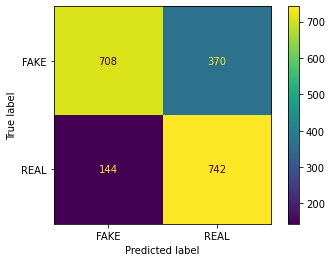

Wall time: 314 ms


In [ ]:
%%time
score_model(lr, X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2)

In [ ]:
predictions_probalr = lr.predict_proba(X_test_chi2)
precisionlr, recalllr, _ = precision_recall_curve(y_test_chi2,predictions_probalr[:, 1],pos_label='REAL')
fprlr, tprlr, _ = roc_curve(y_test_chi2,predictions_probalr[:, 1],pos_label='REAL')
lr_auc = auc(fprlr, tprlr)

### Random Forest

In [ ]:
%%time
rf = RandomForestClassifier(n_estimators=500,class_weight='balanced', random_state=42)
rf.fit(X_train_chi2, y_train_chi2)

Wall time: 14.8 s


RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)
Train Accuracy       1.00000
Test Accuracy        0.75967
Test Precision       0.76220
Test Recall          0.75967
Test F1              0.76018
Test F2              0.75969
Classification report:
              precision    recall  f1-score   support

        FAKE    0.79823   0.75232   0.77459      1078
        REAL    0.71835   0.76862   0.74264       886

    accuracy                        0.75967      1964
   macro avg    0.75829   0.76047   0.75862      1964
weighted avg    0.76220   0.75967   0.76018      1964



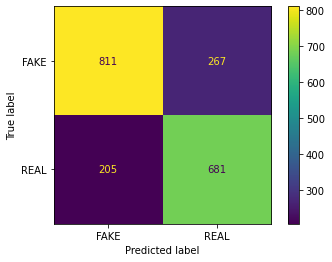

Wall time: 2.64 s


In [ ]:
%%time
score_model(rf, X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2)

In [ ]:
predictions_probarf = rf.predict_proba(X_test_chi2)
precisionrf, recallrf, _ = precision_recall_curve(y_test_chi2,predictions_probarf[:, 1],pos_label='REAL')
fprrf, tprrf, _ = roc_curve(y_test_chi2,predictions_probarf[:, 1],pos_label='REAL')
rf_auc = auc(fprrf, tprrf)

## Confronto tra classificatori

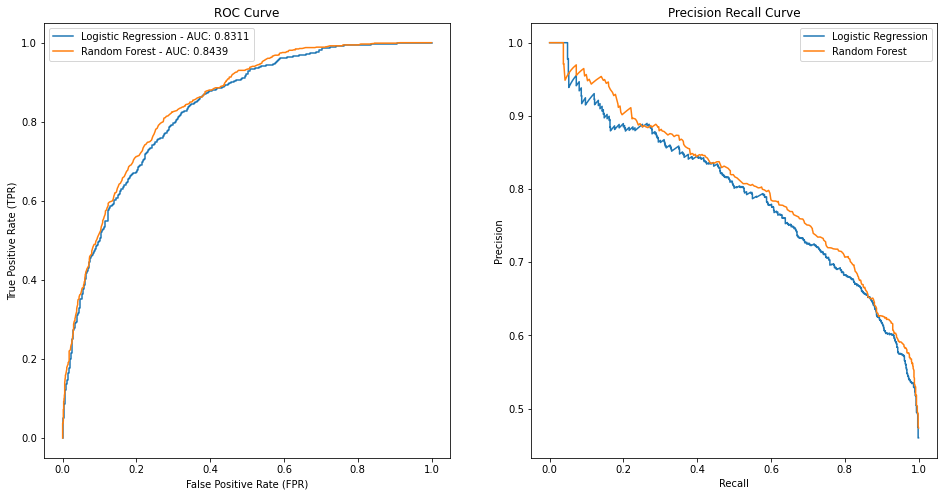

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
plt.title('ROC Curve')
plt.plot(fprlr, tprlr, label='Logistic Regression - AUC: {}'.format(np.round(lr_auc, 4)))
plt.plot(fprrf, tprrf, label='Random Forest - AUC: {}'.format(np.round(rf_auc, 4)))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Precision Recall Curve')
plt.plot(recalllr, precisionlr, label='Logistic Regression')
plt.plot(recallrf, precisionrf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Clustering

In [35]:
data.groupby('Source').size().sort_values(ascending=False).head(20)

Source
Donald Trump       795
Facebook posts     653
Bloggers           533
Viral image        390
Hillary Clinton    207
Bernie Sanders     159
Barack Obama       124
Ted Cruz           121
Scott Walker       119
Marco Rubio         98
Rick Scott          70
Jeb Bush            69
Joe Biden           61
Greg Abbott         50
Rand Paul           46
Paul Ryan           44
Mike Pence          42
Ron Johnson         40
Tammy Baldwin       37
Tim Kaine           35
dtype: int64

In [36]:
sources = [
'Joe Biden',
'Jeb Bush',
'Rick Scott',
'Marco Rubio',
'Scott Walker',
'Ted Cruz',
'Barack Obama',
'Bernie Sanders',
'Hillary Clinton',
'Donald Trump']

In [37]:
colormap = {
'Joe Biden': '#D98880',
'Barack Obama': '#922b21',
'Bernie Sanders': '#cb4335',
'Hillary Clinton': '#FADBD8',
'Jeb Bush': '#5dade2',
'Rick Scott' : '#85c1e9',
'Marco Rubio' : '#aed6f1',
'Scott Walker': '#2980b9',
'Ted Cruz': '#1f618d',
'Donald Trump' : '#154360'
}

In [38]:
data.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label,corpus,text,grouped_label,temp,char_count,word_count,word_density,punctuation_count,upper_case_word_count
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE,[It’s Father’s Day weekend. What do you get fo...,father day weekend get wealthy man also occupi...,FAKE,It’s Father’s Day weekend. What do you get for...,0.173188,0.184967,0.404920,0.215768,0.097561
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,[President Donald Trump shared a manipulated v...,president donald trump shared manipulated vide...,FAKE,President Donald Trump shared a manipulated vi...,0.151200,0.159912,0.433766,0.174274,0.317073
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE,[President Donald Trump is continuing to stand...,president donald trump continuing stand firm o...,FAKE,President Donald Trump is continuing to stand ...,0.158299,0.180177,0.217490,0.170124,0.146341
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,[Paul Junge — one of several Republican candid...,paul junge one several republican candidates l...,FAKE,Paul Junge — one of several Republican candida...,0.314116,0.321297,0.552896,0.261411,0.158537
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE,"[The death of George Floyd, a Black man, at th...",death george floyd black man hands minneapolis...,REAL,"The death of George Floyd, a Black man, at the...",0.167301,0.180177,0.379629,0.153527,0.073171


In [39]:
%%time
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.50, tokenizer=lemmatize_all)
Xvec = vectorizer.fit_transform(data['text'])

CPU times: user 5min 27s, sys: 1.36 s, total: 5min 29s
Wall time: 5min 29s


In [40]:
w_matrix = Xvec.toarray()

vocab = vectorizer.get_feature_names_out()

w_df = pd.DataFrame(np.round(w_matrix, 2), columns=list(vocab))

In [41]:
w_df

,a,abandon,abbott,abc,abide,ability,able,abortion,about,above,abroad,absence,absent,absolute,absolutely,absurd,abuse,aca,academic,academy,accept,access,accident,accompany,accomplish,accomplishment,account,accountability,accounting,accuracy,accurate,accurately,accusation,accuse,achieve,achievement,acknowledge,acquire,across,act,...,wish,with,withdraw,withhold,within,without,witness,woman,wonder,wondered,wood,word,work,worker,workforce,world,worldwide,worry,worse,worst,worth,wound,wrinkle,write,writer,wrong,wrongly,y,yearly,yes,yesterday,yet,yield,york,you,young,youth,youtube,zero,zone
0,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.02,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.02,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.02,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.03,0.0,0.0,0.05,0.00,0.00
1,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.03,0.00,0.0,0.0,0.00,0.09,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.04,0.00,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.03,0.03,0.0,0.0,0.00,0.00,0.00
2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.14,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.04,0.00,0.0,0.0,0.00,0.06,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.06,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
4,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.03,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.04,0.0,0.0,0.0,0.05,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.02,0.00,0.00,0.0,0.0,0.03,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.02,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.01,0.00,0.00,0.01,0.0,0.0,0.00,0.00,0.00
9815,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.00,0.02,0.00,0.00,0.0,0.0,0.00,0.03,0.0,0.0,0.02,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.02,0.0,0.0,0.03,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
9816,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.02,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.02,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.03,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
9817,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.02,0.04,0.0,0.0,0.0,0.01,0.00,...,0.0,0.0

In [42]:
df_clust = pd.merge(w_df, 
                       data.loc[:,['Source','char_count', 'word_count', 
                                   'word_density', 'punctuation_count', 'upper_case_word_count']].reset_index(drop=True), 
                       left_index=True, right_index=True)

In [43]:
Xvec_clust = df_clust[df_clust['Source'].isin(sources)].drop('Source', axis=1)
y_clust = df_clust[df_clust['Source'].isin(sources)].loc[:,'Source']

In [44]:
X_names = list(Xvec_clust.columns)
p_value_limit = 0.99
dtf_features = pd.DataFrame()
for cat in np.unique(y_clust):
    chi2_, p = chi2(Xvec_clust, y_clust==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
print("Numero di feature considerate: {}".format(len(X_names)))

Numero di feature considerate: 82


In [45]:
df_clust_chi2 = pd.merge(Xvec_clust.loc[:,X_names],
                       y_clust,
                       left_index=True, right_index=True).reset_index(drop=True)

In [46]:
%%time
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=30, random_state=42)
datasvd = svd.fit_transform(df_clust_chi2.drop('Source', axis=1)) 
scatter_x = datasvd[:, 0]
scatter_y = datasvd[:, 1]

CPU times: user 88.2 ms, sys: 84.9 ms, total: 173 ms
Wall time: 88 ms


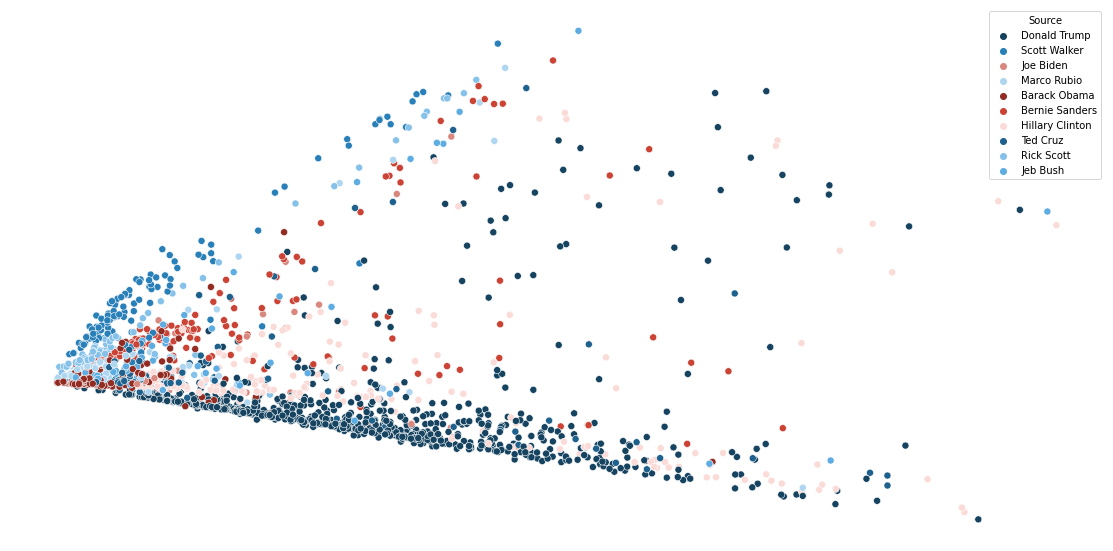

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=df_clust_chi2['Source'], palette=colormap, s=50)
plt.tight_layout()
plt.axis('off')
plt.show()

In [48]:
%%time
tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=30, early_exaggeration=16, 
            n_iter=1000)
datatsne = tsne.fit_transform(df_clust_chi2.drop('Source', axis=1)) 

CPU times: user 23.6 s, sys: 214 ms, total: 23.8 s
Wall time: 13 s


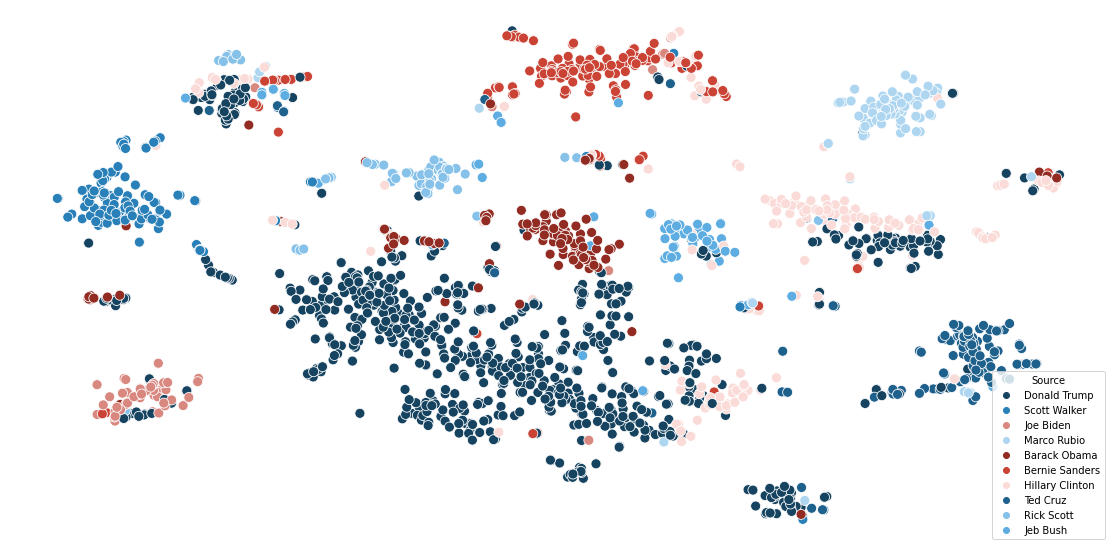

In [49]:
scatter_x = datatsne[:, 0]
scatter_y = datatsne[:, 1]

plt.figure(figsize=(16, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=df_clust_chi2['Source'], palette=colormap, s=100)
plt.tight_layout()
plt.axis('off')
plt.show()

In [50]:
def score_clustering(true_labels, predicted_labels):
    d = {
        "Rand index": rand_score(true_labels, predicted_labels),
        "Fowlkes Mallows": fowlkes_mallows_score(true_labels, predicted_labels)
        }
    for k, v in d.items():
        print(f"{k:21s}: {v}")

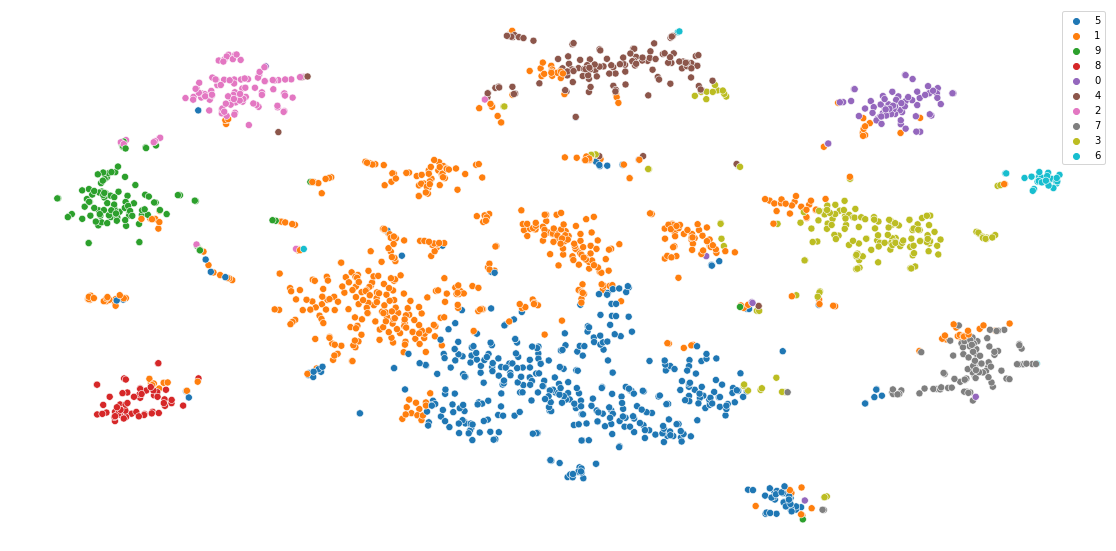

In [51]:
kmeans = KMeans(n_clusters=len(sources), random_state=42)
labels_pred = kmeans.fit_predict(df_clust_chi2.drop('Source', axis=1))
plt.figure(figsize=(16, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=labels_pred.astype(str), palette='tab10', s=50)
plt.tight_layout()
plt.axis('off')
plt.show()

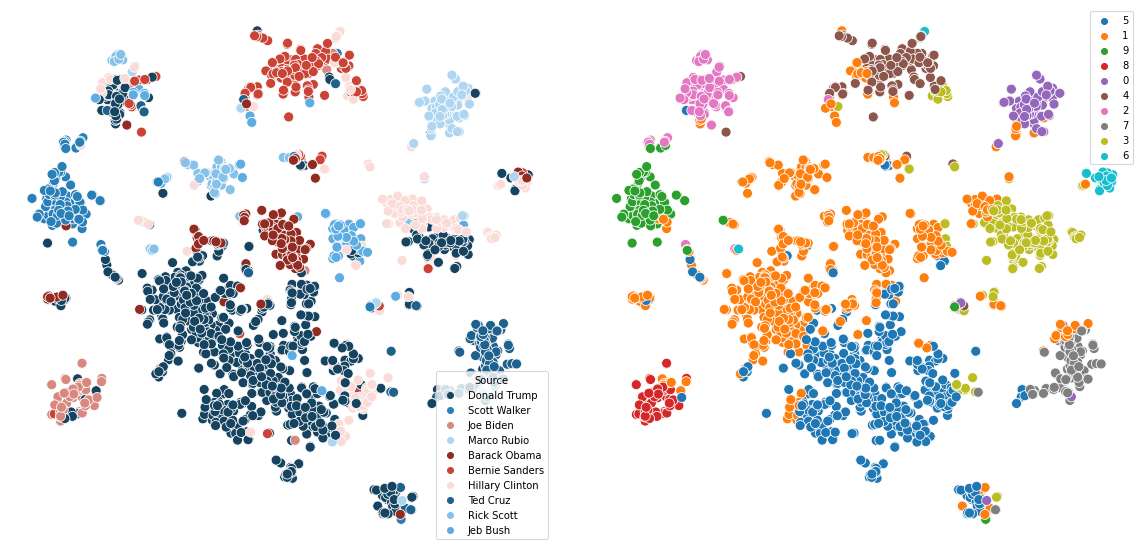

In [52]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
sns.scatterplot(x = scatter_x, y=scatter_y, hue=df_clust_chi2['Source'], palette=colormap, s=100)
plt.tight_layout()
plt.axis('off')

plt.subplot(1, 2, 2)
sns.scatterplot(x = scatter_x, y=scatter_y, hue=labels_pred.astype(str), palette='tab10', s=100)
plt.tight_layout()
plt.axis('off')

plt.show()

In [53]:
score_clustering(df_clust_chi2['Source'], labels_pred)

Rand index           : 0.7492318243591913
Fowlkes Mallows      : 0.4188559465765686


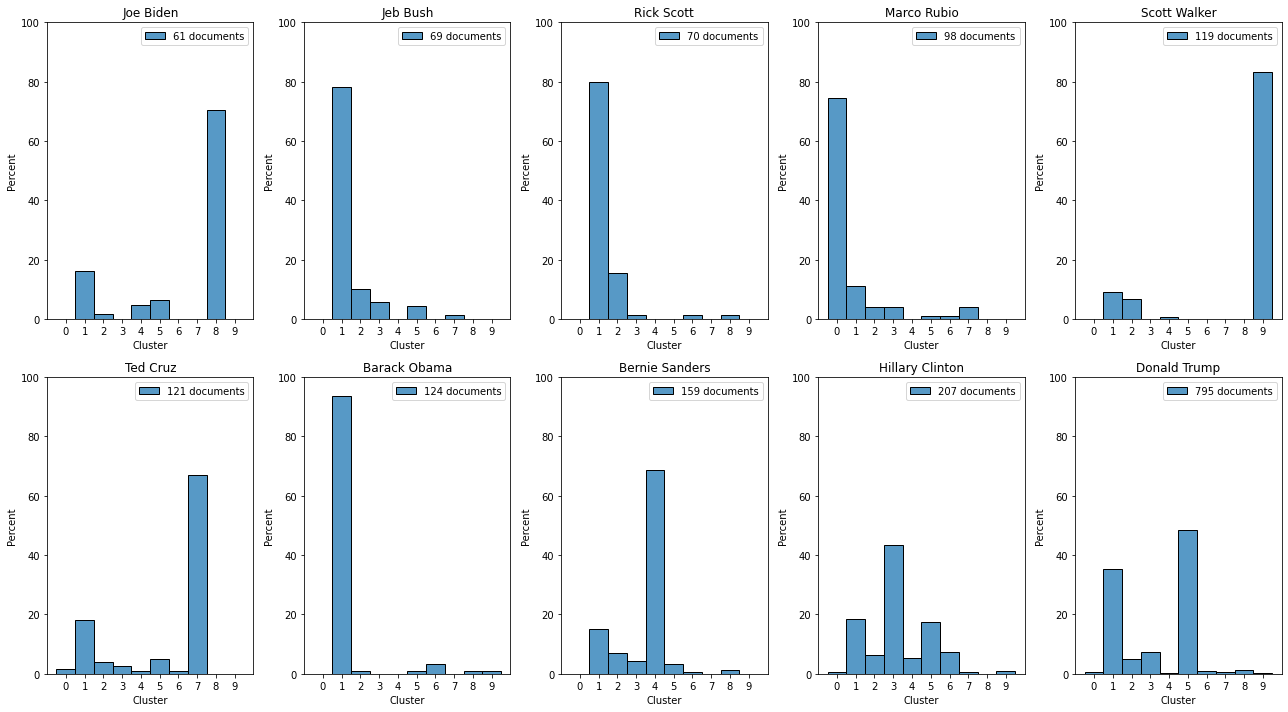

In [54]:
df_clust_chi2['clust_labels']=labels_pred
plt.figure(figsize=(18,10))

for i, source in enumerate(sources):
    plt.subplot(2,5,i+1)
    plt.title(source)
    sns.histplot(df_clust_chi2[df_clust_chi2['Source']==source]['clust_labels'], stat="percent", 
                 discrete=True, label='{} documents'.format(len(df_clust_chi2[df_clust_chi2['Source']==source])))
    plt.xticks(ticks=np.arange(0,10))
    plt.xlabel('Cluster')
    plt.legend()
    plt.xlim(-1,10)
    plt.ylim(0,100)
plt.tight_layout()
plt.show()